# Skalowanie obrazów
### Skalowanie bitmapy 512x512 pikseli poprzez operacje interpolacji na wierszach i kolumnach

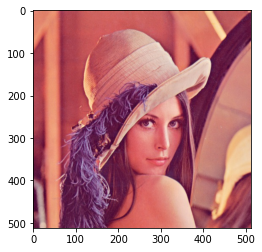

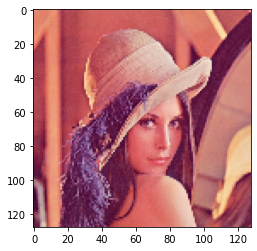

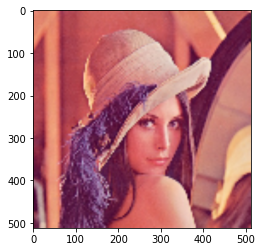

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SCALE_FACTOR = 4

def resize_image(image, scale_factor):
    # Oblicz nowe wymiary obrazu po skalowaniu
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Stwórz pustą macierz o nowych wymiarach
    scaled_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Przelicz współrzędne pikseli dla obrazu przeskalowanego
    for y in range(new_height):
        for x in range(new_width):
            # Oblicz współrzędne piksela w oryginalnym obrazie
            src_x = x / scale_factor
            src_y = y / scale_factor

            # Oblicz współrzędne piksela sąsiednich punktów
            x1 = int(src_x)
            x2 = x1 + 1 if x1 < width - 1 else x1
            y1 = int(src_y)
            y2 = y1 + 1 if y1 < height - 1 else y1

            # Oblicz wartości wag dla interpolacji liniowej
            weight_x = src_x - x1
            weight_y = src_y - y1

            # Wykonaj interpolację liniową dla każdej składowej koloru
            for channel in range(3):
                interpolated_value = (
                    (1 - weight_y) * (1 - weight_x) * image[y1, x1, channel] +
                    (1 - weight_y) * weight_x * image[y1, x2, channel] +
                    weight_y * (1 - weight_x) * image[y2, x1, channel] +
                    weight_y * weight_x * image[y2, x2, channel]
                )

                # Przypisz interpolowaną wartość do piksela w obrazie przeskalowanym
                scaled_image[y, x, channel] = int(interpolated_value)

    return scaled_image

image = plt.imread("img/lena.bmp")

# Zmniejszenie i następnie zwiększenie obrazu
result_scaled_down = resize_image(image, 1/SCALE_FACTOR)
result_scaled_up = resize_image(result_scaled_down, SCALE_FACTOR)

plt.imshow(image) # oryginalny obraz
plt.show()

plt.imshow(result_scaled_down)
plt.show()

plt.imshow(result_scaled_up)
plt.show()
plt.imsave("img/lena_wez_rutinoscorbin.bmp", result_scaled_up)

### Porównanie obrazów: miara MSE (Mean Squared Error) i MAE (Mean Absolute Error)

In [3]:
from PIL import Image
import numpy as np

def calculate_mse(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return mse

def calculate_mae(image1, image2):
    mae = np.mean(np.abs(image1 - image2))
    return mae

# Wczytaj oba obrazy z pliku BMP
image1 = Image.open("img/lena.bmp").convert('RGB')
image2 = Image.open("img/lena_wez_rutinoscorbin.bmp").convert('RGB')

# Konwertuj obrazy na macierze NumPy
image1_array = np.array(image1)
image2_array = np.array(image2)

width1, height1 = image1.size
width2, height2 = image2.size
# Sprawdź, czy oba obrazy mają ten sam rozmiar
if image1_array.shape != image2_array.shape:
    print("Obrazy mają różne rozmiary: ", width1, height1, ", ", width2, height2)
else:
    # Oblicz MSE
    mse_value = calculate_mse(image1_array, image2_array)
    mae_value = calculate_mae(image1_array, image2_array)
    print("MSE: ", mse_value)
    print("MAE: ", mae_value)


MSE:  30.178306579589844
MAE:  98.2170181274414


Po dokonaniu operacji zmniejszenia a następnie powiększenia obrazu do oryginalnych wymiarów, zauważalnie spada jego jakość. Im większy współczynnik skalowania, tym bardziej obraz wyjściowy staje się rozpikselowany. 
Subiektywne odczucia potwierdzają miary MSE i MAE. MSE mierzy średnią kwadratową różnicę między wartościami pikseli dwóch obrazów, natomiast MAE mierzy średni błąd bezwzględny. Im większy dobrany współczynnik skalowania, tym większa wartość MSE i MAE.

Jeśli obraz zostaje najpierw powiększony a następnie pomniejszony do początkowych wymiarów to nie jest zauważalna utrata jakości obrazu, a MSE i MAE są równe 0.